In [2]:
# HIDDEN
from datascience import *
import matplotlib
matplotlib.use('Agg', warn=False)
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np
np.set_printoptions(threshold=50)

In [3]:
# The table has 50 rows, corresponding to the 50 top grossing actors. 
actors = Table.read_table('actors.csv')
actors

Actor,Total Gross,Number of Movies,Average per Movie,#1 Movie,Gross
Harrison Ford,4871.7,41,118.8,Star Wars: The Force Awakens,936.7
Samuel L. Jackson,4772.8,69,69.2,The Avengers,623.4
Morgan Freeman,4468.3,61,73.3,The Dark Knight,534.9
Tom Hanks,4340.8,44,98.7,Toy Story 3,415
"Robert Downey, Jr.",3947.3,53,74.5,The Avengers,623.4
Eddie Murphy,3810.4,38,100.3,Shrek 2,441.2
Tom Cruise,3587.2,36,99.6,War of the Worlds,234.3
Johnny Depp,3368.6,45,74.9,Dead Man's Chest,423.3
Michael Caine,3351.5,58,57.8,The Dark Knight,534.9
Scarlett Johansson,3341.2,37,90.3,The Avengers,623.4


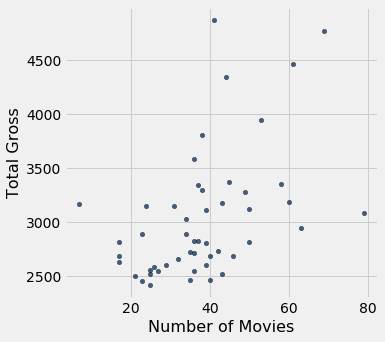

In [4]:
# Scatter Plots and Line Graphs
actors.scatter('Number of Movies', 'Total Gross') # horizontal axis
#It slopes upwards, in general.The more movies an actor has been in, the more the total gross of all of those movies – in general.
#The plot shows an association between the variables, and that the association is positive. Of course there is some variability.


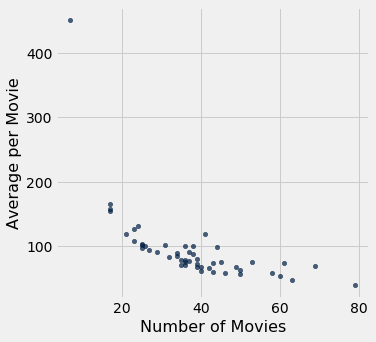

In [5]:
actors.scatter('Number of Movies', 'Average per Movie')
# Negative association. In general, the more movies an actor has been in, the less the average receipt per movie.
# one of the points is quite high and off to the left of the plot. 
# It corresponds to one actor who has a low number of movies and high average per movie. This point is an outlier.
# For the right end, let's zoom in on the main body of the plot by just looking at the portion that doesn't have the outlier.

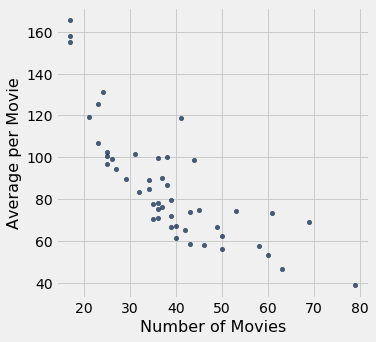

In [6]:
no_outlier = actors.where('Number of Movies', are.above(10))
no_outlier.scatter('Number of Movies', 'Average per Movie')

In [7]:
actors.where('Number of Movies', are.above(60))
# DeNiro's is at the extreme end.
# An actor might be in some high-grossing action movies, and also in a large number of smaller films.  T
# Thus the actor's value of average receipts per movie might be relatively low.

Actor,Total Gross,Number of Movies,Average per Movie,#1 Movie,Gross
Samuel L. Jackson,4772.8,69,69.2,The Avengers,623.4
Morgan Freeman,4468.3,61,73.3,The Dark Knight,534.9
Robert DeNiro,3081.3,79,39,Meet the Fockers,279.3
Liam Neeson,2942.7,63,46.7,The Phantom Menace,474.5


In [8]:
actors.where('Number of Movies', are.below(10))
# Mr. Daniels' entire filmography (apart from cameos) consists of movies in the high-grossing Star Wars franchise.
# That explains both his high average receipt and his low number of movies.

Actor,Total Gross,Number of Movies,Average per Movie,#1 Movie,Gross
Anthony Daniels,3162.9,7,451.8,Star Wars: The Force Awakens,936.7


In [11]:
# Line Graphs
movies_by_year = Table.read_table('movies_by_year.csv')
movies_by_year

Year,Total Gross,Number of Movies,#1 Movie
2015,11128.5,702,Star Wars: The Force Awakens
2014,10360.8,702,American Sniper
2013,10923.6,688,Catching Fire
2012,10837.4,667,The Avengers
2011,10174.3,602,Harry Potter / Deathly Hallows (P2)
2010,10565.6,536,Toy Story 3
2009,10595.5,521,Avatar
2008,9630.7,608,The Dark Knight
2007,9663.8,631,Spider-Man 3
2006,9209.5,608,Dead Man's Chest


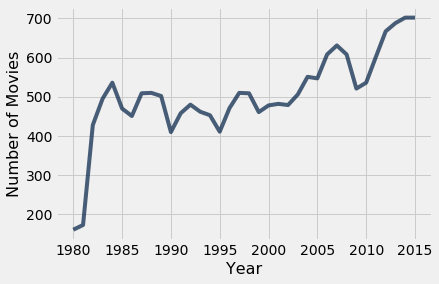

In [12]:
movies_by_year.plot('Year', 'Number of Movies')
# The graph rises sharply and then has a gentle upwards trend though the numbers vary noticeably from year to year.

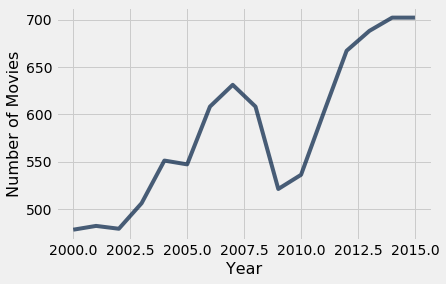

In [14]:
century_21 = movies_by_year.where('Year', are.above(1999))
century_21.plot('Year', 'Number of Movies')# The global financial crisis of 2008 has a visible effect – in 2009 there is a sharp drop in the number of movies released.

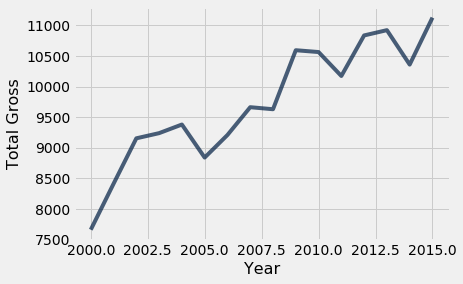

In [15]:
# The dollar figures, however, didn't suffer much.
century_21.plot('Year', 'Total Gross')
# The total domestic gross receipt was higher in 2009 than in 2008, even though there was a financial crisis and a much smaller number of movies were released.

In [16]:
# In 2009, another reason for high box office receipts was the movie Avatar and its 3D release. Not only was Avatar the #1 movie of 2009, it is also by some calculations the second highest grossing movie of all time
century_21.where('Year', are.equal_to(2009))

Year,Total Gross,Number of Movies,#1 Movie
2009,10595.5,521,Avatar


In [17]:
# Visualizing Categorical Distributions
# The values of the categorical variable "flavor" are chocolate, strawberry, and vanilla. The table shows the number of cartons of each flavor. 
# We call this a distribution table. A distribution shows all the values of a variable, along with the frequency of each one.
icecream = Table().with_columns(
    'Flavor', make_array('Chocolate', 'Strawberry', 'Vanilla'),
    'Number of Cartons', make_array(16, 5, 9)
)
icecream

Flavor,Number of Cartons
Chocolate,16
Strawberry,5
Vanilla,9


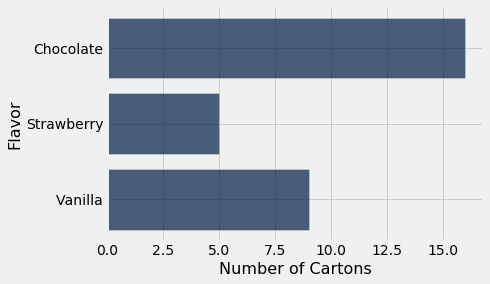

In [18]:
# Bar Chart
icecream.barh('Flavor', 'Number of Cartons')

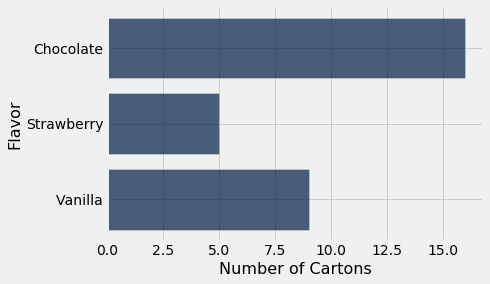

In [19]:
icecream.barh('Flavor')

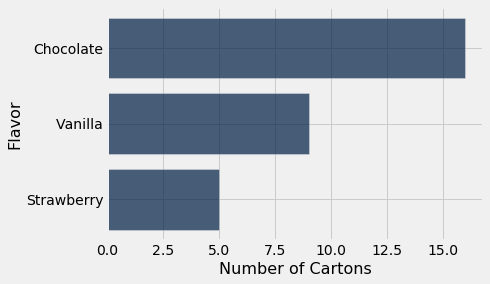

In [20]:
icecream.sort('Number of Cartons', descending=True).barh('Flavor')

In [3]:
top = Table.read_table('top_movies.csv')
top

Title,Studio,Gross,Gross (Adjusted),Year
Star Wars: The Force Awakens,Buena Vista (Disney),906723418,906723400,2015
Avatar,Fox,760507625,846120800,2009
Titanic,Paramount,658672302,1178627900,1997
Jurassic World,Universal,652270625,687728000,2015
Marvel's The Avengers,Buena Vista (Disney),623357910,668866600,2012
The Dark Knight,Warner Bros.,534858444,647761600,2008
Star Wars: Episode I - The Phantom Menace,Fox,474544677,785715000,1999
Star Wars,Fox,460998007,1549640500,1977
Avengers: Age of Ultron,Buena Vista (Disney),459005868,465684200,2015
The Dark Knight Rises,Warner Bros.,448139099,500961700,2012


In [4]:
movies_and_studios = top.select('Title', 'Studio')

In [5]:
movies_and_studios.group('Studio')

Studio,count
AVCO,1
Buena Vista (Disney),29
Columbia,10
Disney,11
Dreamworks,3
Fox,26
IFC,1
Lionsgate,3
MGM,7
MPC,1


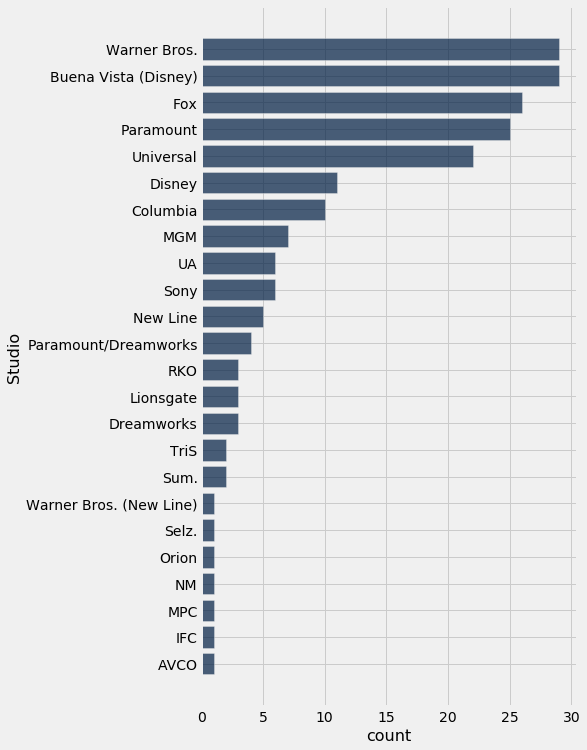

In [6]:
studio_distribution = movies_and_studios.group('Studio')
studio_distribution.sort('count', descending=True).barh('Studio')

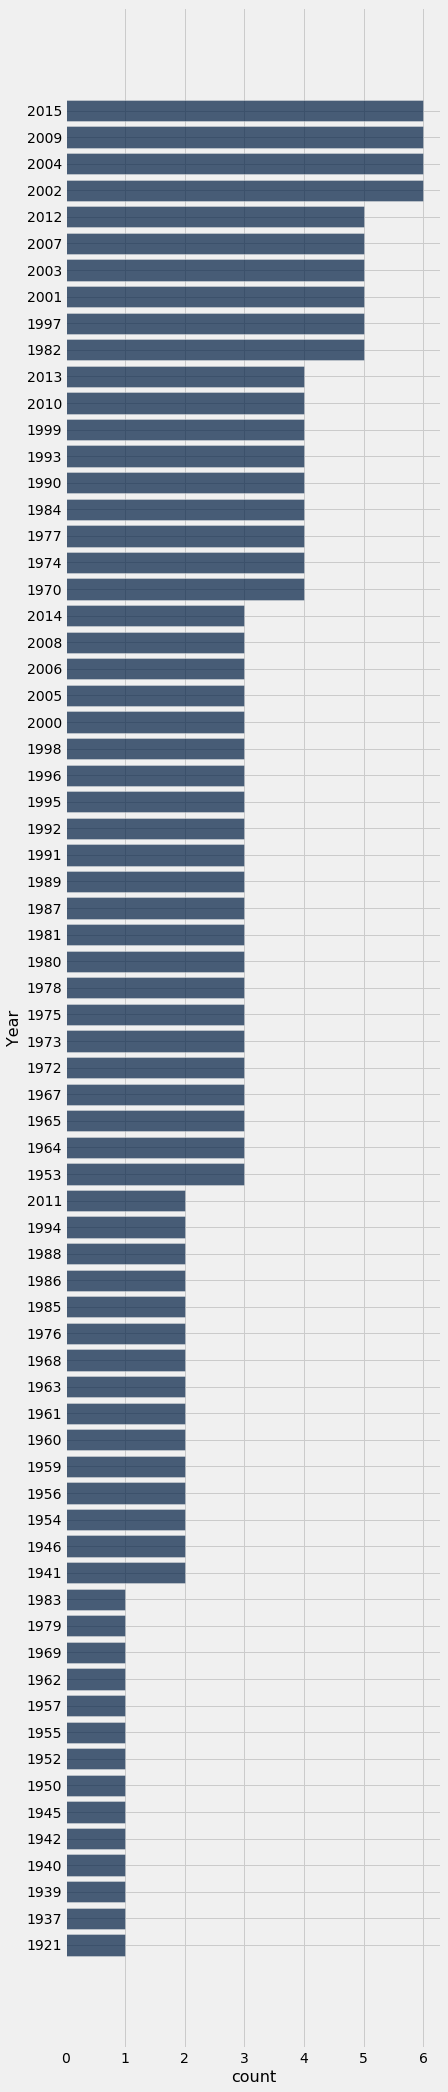

In [7]:
#Because total gross receipts are being measured in unadjusted dollars, it is not very surprising that the top movies are more frequently from recent years than from bygone decades.
movies_and_years = top.select('Title', 'Year')
movies_and_years.group('Year').sort('count', descending=True).barh('Year')
#All of the longest bars correspond to years after 2000. This is consistent with our observation that recent years should be among the most frequent.
#It doesn't list all the years in chronological order. It is treating Year as a categorical variable.

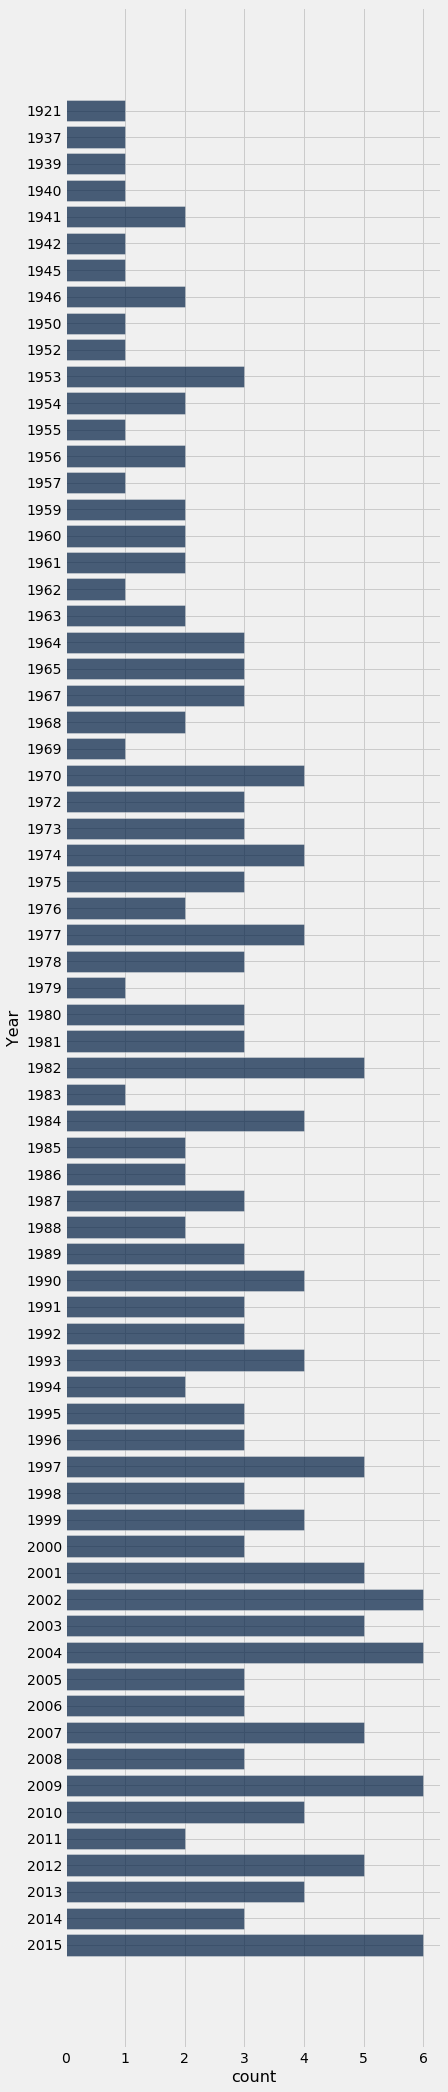

In [8]:
#By default, barh sorts the categories (years) from lowest to highest. So we will run the code without sorting by count.
movies_and_years.group('Year').barh('Year')
# Bar charts are intended as visualizations of categorical variables. 
# The bars at 1921 and 1937 are just as far apart from each other as the bars at 1937 and 1939. 
# The bar chart doesn't show that none of the 200 movies were released in the years 1922 through 1936, nor in 1938.

In [9]:
# Make the numbers in the Gross and Gross (Adjusted) columns look nicer:
top.set_format([2, 3], NumberFormatter)

Title,Studio,Gross,Gross (Adjusted),Year
Star Wars: The Force Awakens,Buena Vista (Disney),"906,723,418","906,723,400",2015
Avatar,Fox,"760,507,625","846,120,800",2009
Titanic,Paramount,"658,672,302","1,178,627,900",1997
Jurassic World,Universal,"652,270,625","687,728,000",2015
Marvel's The Avengers,Buena Vista (Disney),"623,357,910","668,866,600",2012
The Dark Knight,Warner Bros.,"534,858,444","647,761,600",2008
Star Wars: Episode I - The Phantom Menace,Fox,"474,544,677","785,715,000",1999
Star Wars,Fox,"460,998,007","1,549,640,500",1977
Avengers: Age of Ultron,Buena Vista (Disney),"459,005,868","465,684,200",2015
The Dark Knight Rises,Warner Bros.,"448,139,099","500,961,700",2012


In [10]:
millions = top.select(0).with_column('Adjusted Gross', 
                                     np.round(top.column(3)/1e6, 2))
millions

Title,Adjusted Gross
Star Wars: The Force Awakens,906.72
Avatar,846.12
Titanic,1178.63
Jurassic World,687.73
Marvel's The Avengers,668.87
The Dark Knight,647.76
Star Wars: Episode I - The Phantom Menace,785.72
Star Wars,1549.64
Avengers: Age of Ultron,465.68
The Dark Knight Rises,500.96


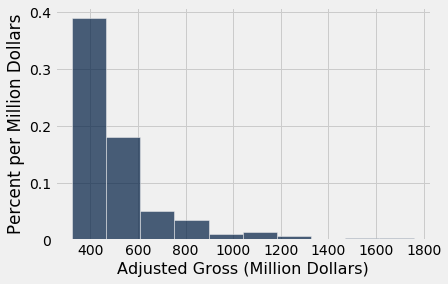

In [11]:
millions.hist('Adjusted Gross', unit="Million Dollars")
# The optional unit argument is used in the labels on the two axes. 
# hist has an endpoint convention: bins include the data at their left endpoint, but not the data at their right endpoint.

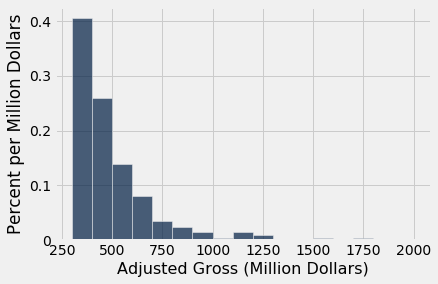

In [12]:
millions.hist('Adjusted Gross', bins=np.arange(300,2001,100), unit="Million Dollars")
# A very small number of movies grossed 800 million dollars or more. This results in the figure being "skewed to the right," or, less formally, having "a long right hand tail."

In [13]:
bin_counts = millions.bin('Adjusted Gross', bins=np.arange(300,2001,100))
bin_counts.show()
# Notice the bin value 2000 in the last row. That's not the left end-point of any bar – it's the right end point of the last bar. 

bin,Adjusted Gross count
300,81
400,52
500,28
600,16
700,7
800,5
900,3
1000,1
1100,3
1200,2


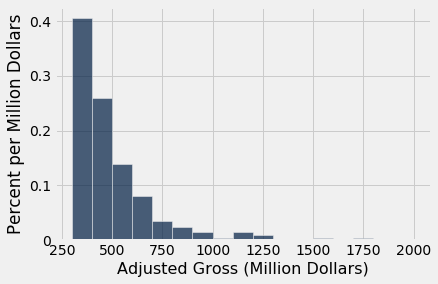

In [14]:
# bin_column named argument to specify which column contains the bin lower bounds.
bin_counts.hist('Adjusted Gross count', bin_column='bin', unit='Million Dollars')

In [15]:
#Calculation. The height of each bar is the percent of elements that fall into the corresponding bin, relative to the width of the bin.
counts = bin_counts.relabeled('Adjusted Gross count', 'Count')
percents = counts.with_column(
    'Percent', (counts.column('Count')/200)*100
    )
heights = percents.with_column(
    'Height', percents.column('Percent')/100
    )
heights
#Units. The height of the bar is 40.5% divided by 100 million dollars, and so the height is 0.405% per million dollars.
#This method of drawing histograms creates a vertical axis that is said to be on the density scale. 
#The height of bar is not the percent of entries in the bin; it is the percent of entries in the bin relative to the amount of space in the bin. 
#That is why the height measures crowdedness or density.

bin,Count,Percent,Height
300,81,40.5,0.405
400,52,26,0.26
500,28,14,0.14
600,16,8,0.08
700,7,3.5,0.035
800,5,2.5,0.025
900,3,1.5,0.015
1000,1,0.5,0.005
1100,3,1.5,0.015
1200,2,1,0.01


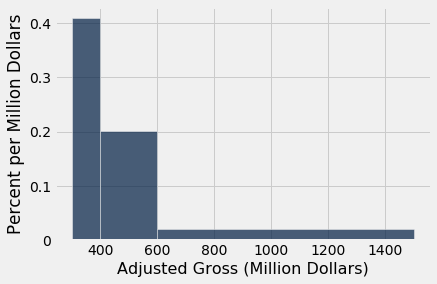

In [16]:
#Unequal Bins
uneven = make_array(300, 400, 600, 1500)
millions.hist('Adjusted Gross', bins=uneven, unit="Million Dollars")

In [17]:
millions.bin('Adjusted Gross', bins=uneven)
# Although the ranges [300, 400) and [400, 600) have nearly identical counts, the bar over the former is twice as tall as the latter because it is only half as wide.
# The density of values in the [300, 400) is twice as much as the density in [400, 600).
# Histograms help us visualize where on the number line the data are most concentrated, epecially when the bins are uneven.

bin,Adjusted Gross count
300,81
400,80
600,37
1500,0


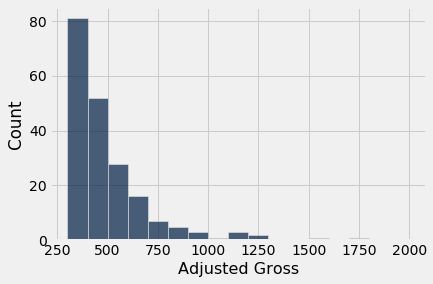

In [18]:
# It is possible to display counts directly in a chart, using the normed=False
millions.hist('Adjusted Gross', bins=np.arange(300,2001,100), normed=False)
# While the count scale is perhaps more natural to interpret than the density scale, the chart becomes highly misleading when bins have different widths.

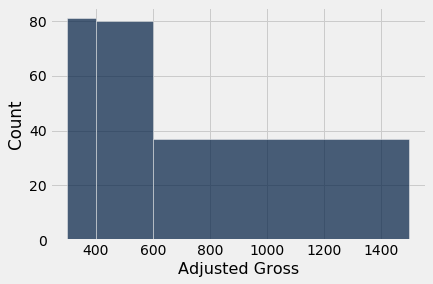

In [19]:
millions.hist('Adjusted Gross', bins=uneven, normed=False)
# It appears (due to the count scale) that high-grossing movies are quite common, when in fact we have seen that they are relatively rare.
# Even though the method used is called hist, the figure above is NOT A HISTOGRAM.
# It misleadingly exaggerates the proportion of movies grossing at least 600 million dollars. 
#  The height of each bar is simply plotted at the number of movies in the bin, without accounting for the difference in the widths of the bins.

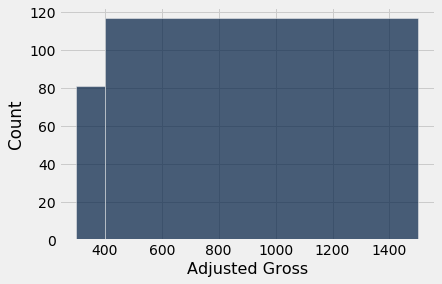

In [20]:
# The picture becomes even more absurd if the last two bins are combined.
very_uneven = make_array(300, 400, 1500)
millions.hist('Adjusted Gross', bins=very_uneven, normed=False)
# In this count-based figure, the shape of the distribution of movies is lost entirely.
# The figure above shows that what the eye perceives as "big" is area, not just height. This observation becomes particularly important when the bins have different widths.
# The units of height are "percent per unit on the horizontal axis."- Density scale

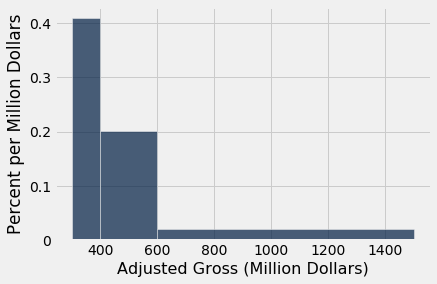

In [21]:
#Flat Tops and the Level of Detail
millions.hist('Adjusted Gross', bins=uneven, unit="Million Dollars")
#Take another look at the [300, 400) bin in the figure below. The flat top of the bar, at the level 0.405% per million dollars,
#hides the fact that the movies are somewhat unevenly distributed across that bin.

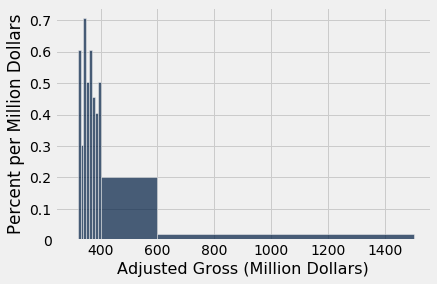

In [22]:
some_tiny_bins = make_array(300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 600, 1500)
millions.hist('Adjusted Gross', bins=some_tiny_bins, unit='Million Dollars')
# Some of the skinny bars are taller than 0.405 and others are shorter; the first two have heights of 0 because there are no data between 300 and 32
# By putting a flat top at the level 0.405 across the whole bin, we are deciding to ignore the finer detail and are using the flat level as a rough approximation. 
# The height as a "rough approximation" created by the flat tops.

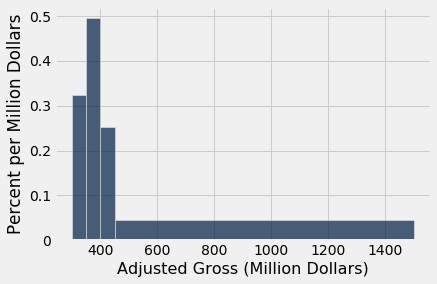

In [23]:
uneven_again = make_array(300, 350, 400, 450, 1500)
millions.hist('Adjusted Gross', bins=uneven_again, unit='Million Dollars')

In [24]:
millions.bin('Adjusted Gross', bins=uneven_again)
# Q: Which has more movies in it?
# A: The [450, 1500) bin. It has 92 movies, compared with 25 movies in the [400, 450) bin.
# Because height represents density per unit of space in the bin, not the number of movies in the bin.

bin,Adjusted Gross count
300,32
350,49
400,25
450,92
1500,0


In [32]:
heights = Table.read_table('galton_subset.csv')
heights

father,mother,son
78.5,67,73.2
75.5,66.5,73.5
75,64,71
75,64,70.5
75,58.5,72
74,68,76.5
74,62,74
73,67,71
73,67,68
73,66.5,71


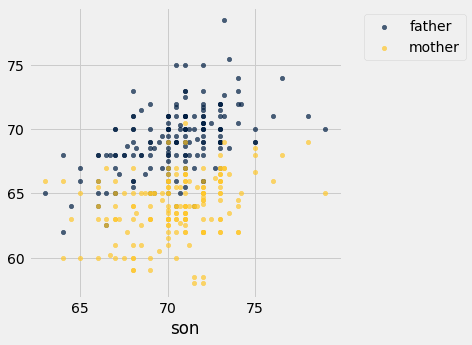

In [34]:
heights.scatter('son')
# Python drew two scatter plots: one each for the relation between this variable and the other two.

In [35]:
# Read the full Census table
census_url = 'http://www2.census.gov/programs-surveys/popest/datasets/2010-2015/national/asrh/nc-est2015-agesex-res.csv'
full_census_table = Table.read_table(census_url)

# Select columns from the full table and relabel some of them
partial_census_table = full_census_table.select(['SEX', 'AGE', 'POPESTIMATE2010', 'POPESTIMATE2014'])
us_pop = partial_census_table.relabeled('POPESTIMATE2010', '2010').relabeled('POPESTIMATE2014', '2014')

# Access the rows corresponding to all children, ages 0-18
children = us_pop.where('SEX', are.equal_to(0)).where('AGE', are.below(19)).drop('SEX')
children.show()

AGE,2010,2014
0,3951330,3949775
1,3957888,3949776
2,4090862,3959664
3,4111920,4007079
4,4077551,4005716
5,4064653,4006900
6,4073013,4135930
7,4043046,4155326
8,4025604,4120903
9,4125415,4108349


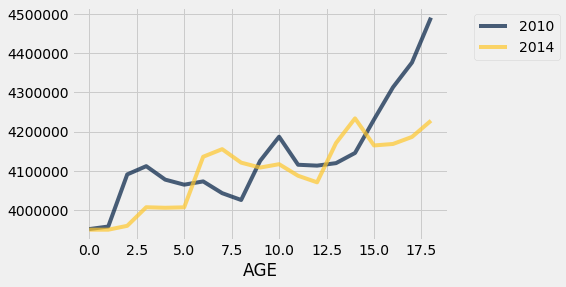

In [36]:
children.plot('AGE')
# there were more 4-year-olds in 2010 than in 2014, and there were more 14-year-olds in 2014 than in 2010
# Of course, the 14-year-olds in 2014 mostly consist of the 10-year-olds in 2010. 
# Indeed, you will notice that the entire gold graph (2014) looks like the blue graph (2010) slid over to the right by 4 years.
# The slide is accompanied by a slight rise due to the net effect of children who entered the country between 2010 and 2014 outnumbering those who left. Fortunately at these ages there is not much loss of life.

In [37]:
usa_ca = Table.read_table('usa_ca_2014.csv')
usa_ca

Ethnicity,USA All,CA All,USA Children,CA Children
Black,0.12,0.05,0.14,0.05
Hispanic,0.18,0.38,0.24,0.5
White,0.62,0.39,0.52,0.29
Other,0.08,0.18,0.1,0.16


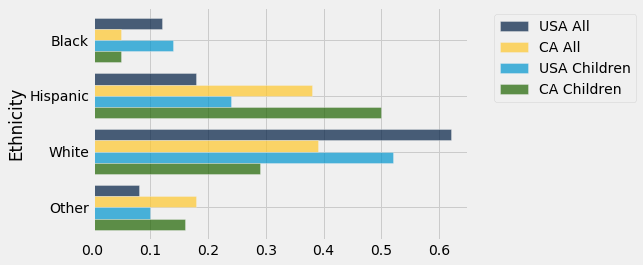

In [38]:
usa_ca.barh('Ethnicity') #  there is a bit too much information

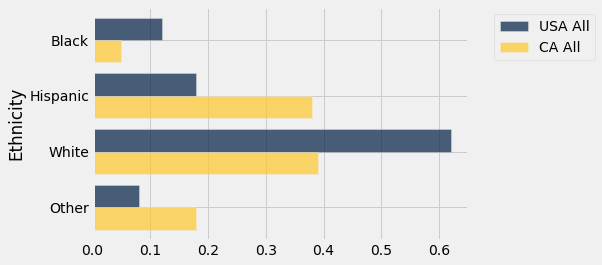

In [42]:
# it's much easier to compare the populations one pair at a time
usa_ca.select('Ethnicity', 'USA All', 'CA All').barh('Ethnicity')
# California has higher proportions in the Hispanic and Other categories, and correspondingly lower proportions of Black and White.
# Almost 40% of the Californian population in 2014 was Hispanic

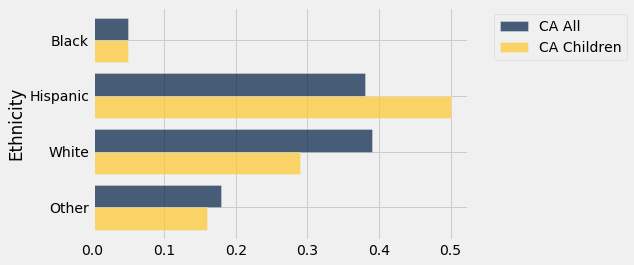

In [43]:
usa_ca.select('Ethnicity', 'CA All', 'CA Children').barh('Ethnicity')
# A comparison with the population of children in the state indicates that the Hispanic proportion is likely to be greater in future years
# Among Californian children, 50% are in the Hispanic category.